# Proyecto 5

## ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Proceso a seguir para completar el completar el proyecto.**

1. Comenzaré por descargar los archivos de excel para darle un vistazo a las tablas y entender lo que sus datos nos muestran.
2. Posteriormente inportaré las bases al NoteBbook para revisar su estructura y validar: tipos de datos, valores repetidos, valores ausentes y si es necesario corregir datos.
3. Una vez que las tablas estén limpias podré empezar con el análisis el cual podrá ser más fácil si uno todas las tablas con las columnas necesarias.
4. Con base en ese df nuevo, realizar mis gráficas para así responder a las hipótesis solicitadas.

# 1.1 Importar librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from scipy import stats

# 1.2 Cargar los datos

In [5]:
calls = pd.read_csv('C:/Users/ralf_/Documents/Proyecto_5/megaline_calls.csv')
internet = pd.read_csv('C:/Users/ralf_/Documents/Proyecto_5/megaline_internet.csv')
menssages = pd.read_csv('C:/Users/ralf_/Documents/Proyecto_5/megaline_messages.csv')
plans = pd.read_csv('C:/Users/ralf_/Documents/Proyecto_5/megaline_plans.csv')
users = pd.read_csv('C:/Users/ralf_/Documents/Proyecto_5/megaline_users.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ralf_/Documents/Proyecto_5/megaline_calls.csv'

# 1.3 Preparación de los datos

**Se analizarán los datos de todas la tablas para realizar las correcciones necesarias y añadirle la información que las pueda eriquecer**

# 1.3.1 Tabla "plans" (Tarifas)

In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [ ]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# 1.3.2 Tabla "users" (Usuarios)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Llenaremos los valores ausentes de la columna 'churn_date' con 'active' para categorizar a los ususarios que actualmente cuentan con un plan activo.** 

In [ ]:
users['churn_date'] = users['churn_date'].fillna('active')

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,active


In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%d/%m/%Y', errors='coerce')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",NaT,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",NaT,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",NaT,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",NaT,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",NaT,surf,active


In [ ]:
users['user_id']= users['user_id'].astype(str)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    0 non-null      datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


# 1.3.3 Tabla 'calls' (Llamadas)

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [ ]:
calls['user_id']= calls['user_id'].astype(str)
calls['call_date'] = pd.to_datetime(calls['call_date'], errors= 'coerce')

calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


# 1.3.4 Tabla "menssajes" (Mensajes)

In [ ]:
menssages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
menssages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Para ésta tabla cambiaremos los tipos de datos de user_id a (str) y message_date a (datetime)**

In [ ]:
menssages['user_id'] = menssages['user_id'].astype(str)
menssages['message_date'] = pd.to_datetime(menssages['message_date'], errors= 'coerce')

menssages.info()
menssages.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


# 1.3.5 Tabla "internet" (Internet)

In [ ]:
internet. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Para esta tabla realizarémos cambios de tipos de datos en las columnas user_id a (str) y mb_used a (datetime)** 

In [ ]:
internet['user_id'] = internet['user_id'].astype(str)
internet['session_date'] = pd.to_datetime(internet['session_date'], errors = 'coerce')

internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


# 1.2 Estudiar las condiciones de las tarífas 

**Revisamos la estructura de las tarifas**

In [ ]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## 1.2.1 Agregar datos por usuario

*Calcularemos el número de llamadas hechas por usuario al mes*

In [ ]:
# Primero accedemos al mes de la fecha
calls['month'] = calls['call_date'].dt.month
# Agrupamos por usuario y el mes y contamos por id, adicional nombramos la columna del conteo
calls_per_user_month = calls.groupby(['user_id','month']).agg(number_of_calls= ('id', 'count')).reset_index()


calls_per_user_month

,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


*Calcularemos los minutos gastados por usuario por mes*

In [ ]:
calls['month'] = calls['call_date'].dt.month
minuts_per_user_month = calls.groupby(['user_id', 'month']).agg(number_of_minuts= ('duration', 'sum')).reset_index()

minuts_per_user_month

,user_id,month,number_of_minuts
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


*Calcularemos el número de mensajes por usuario por mes*

In [ ]:
#Accedemos a al mes de la fecha
menssages['month'] = menssages['message_date'].dt.month
#Agrupar por usuario, mes y contar los mensajes por el id
msg_per_user_month= menssages.groupby(['user_id', 'month']).agg(number_of_msg = ('id', 'count')).reset_index()

msg_per_user_month

,user_id,month,number_of_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


*Calcularemos el tráfico de internet usado por los usuarios por mes*

In [ ]:
#Accedemos al mes de la fecha
internet['month'] = internet['session_date'].dt.month
#Agrupamos por usuario, mes y sumamos los mg usados por mes
mb_per_user_month = internet.groupby(['user_id', 'month']).agg(number_of_mb = ('mb_used','sum')).reset_index()

mb_per_user_month



,user_id,month,number_of_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


*Uniremos todas las tablas realizadas para ver todos los consumos por usuario por mes*

In [ ]:
call_min = pd.merge(calls_per_user_month, minuts_per_user_month, on= ['user_id', 'month'], how= 'outer')
call_min_msg = pd.merge(call_min, msg_per_user_month, on= ['user_id', 'month'], how= 'outer')
monthly_purchases = pd.merge(call_min_msg, mb_per_user_month, on=['user_id', 'month'], how= 'outer')

monthly_purchases = monthly_purchases.fillna(0)

monthly_purchases


,user_id,month,number_of_calls,number_of_minuts,number_of_msg,number_of_mb
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,0.0,23137.69
2289,1499,9,41.0,330.37,0.0,12984.76
2290,1499,10,53.0,363.28,0.0,19492.43
2291,1499,11,45.0,288.56,0.0,16813.83


*Agregaremos los datos del plan y las tarifas por sercvicios excedidos*

In [ ]:
#Unimos la tabla monthly_purchases con usuarios para identificar el plan de cada usuario
service_rates= pd.merge(monthly_purchases, users, on= ['user_id'], how= 'outer')
#Eliminamos columnas no necesarias
col_drop = ['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date']
service_rates = service_rates.drop(labels= col_drop, axis='columns')
#agregamos los datos del plan 
service_rates = pd.merge(service_rates, plans, left_on='plan', right_on='plan_name', how='left')
#eliminamos columnas
service_rates = service_rates.drop('plan_name', axis='columns')





service_rates


,user_id,month,number_of_calls,number_of_minuts,number_of_msg,number_of_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9.0,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10.0,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11.0,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,324.77,0.0,23137.69,surf,50,15360,500,20,10,0.03,0.03
2299,1499,9.0,41.0,330.37,0.0,12984.76,surf,50,15360,500,20,10,0.03,0.03
2300,1499,10.0,53.0,363.28,0.0,19492.43,surf,50,15360,500,20,10,0.03,0.03
2301,1499,11.0,45.0,288.56,0.0,16813.83,surf,50,15360,500,20,10,0.03,0.03


In [ ]:
print(service_rates.isna().sum())

user_id                   0
month                    10
number_of_calls          10
number_of_minuts         10
number_of_msg            10
number_of_mb             10
plan                      0
messages_included         0
mb_per_month_included     0
minutes_included          0
usd_monthly_pay           0
usd_per_gb                0
usd_per_message           0
usd_per_minute            0
dtype: int64


*Eliminaremos los datos nulos ya que al ser muy pocos y no haber registrado ningún consumo no afectará nuestro anlális*

In [ ]:
service_rates.dropna(inplace=True)

In [ ]:
print(service_rates.isna().sum())

user_id                  0
month                    0
number_of_calls          0
number_of_minuts         0
number_of_msg            0
number_of_mb             0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dtype: int64


*Calcularemos los cobros que se le harán al usuario por los servicios exedidos en su plan*

In [ ]:
service_rates

,user_id,month,number_of_calls,number_of_minuts,number_of_msg,number_of_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9.0,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10.0,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11.0,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,324.77,0.0,23137.69,surf,50,15360,500,20,10,0.03,0.03
2299,1499,9.0,41.0,330.37,0.0,12984.76,surf,50,15360,500,20,10,0.03,0.03
2300,1499,10.0,53.0,363.28,0.0,19492.43,surf,50,15360,500,20,10,0.03,0.03
2301,1499,11.0,45.0,288.56,0.0,16813.83,surf,50,15360,500,20,10,0.03,0.03


In [ ]:
# Calculamos los servicios excedidos por usuario 
service_rates['messages_exceeded'] = (service_rates['number_of_msg'] - service_rates['messages_included']).clip(lower=0)
service_rates['minutes_exceeded'] = (service_rates['number_of_minuts']- service_rates['minutes_included']).clip(lower=0)
service_rates['mb_exceeded'] = (service_rates['number_of_mb']- service_rates['mb_per_month_included']).clip(lower=0)

# Calculamos el monto extra que debe cubrir el usuario 

service_rates['add_cost_msg'] = (service_rates['messages_exceeded'] * service_rates['usd_per_message'])
service_rates['add_cost_min'] = (service_rates['minutes_exceeded'] * service_rates['usd_per_minute'])
service_rates['add_cost_mb'] = (service_rates['mb_exceeded'] * service_rates['usd_per_gb'])
service_rates['mb_exceeded'] = np.ceil(service_rates['mb_exceeded'] / 1024)
service_rates['add_cost_gb'] = (service_rates['mb_exceeded']* service_rates['usd_per_gb'])

service_rates['add_cost_total'] = (service_rates['add_cost_min'] + service_rates['add_cost_msg'] + 
                                   service_rates['add_cost_gb'])
service_rates['add_cost_total'] = service_rates['add_cost_total'].round(2)

service_rates['month'] = service_rates['month'].astype(int)
service_rates['number_of_calls'] = service_rates['number_of_calls'].astype(int)
service_rates['number_of_msg'] = service_rates['number_of_msg'].astype(int)
service_rates['messages_exceeded'] = service_rates['messages_exceeded'].astype(int)


#Reordenamos las columnas para tener un mejor entendimiento de la tabla

service_rates_organized = [
    'user_id',
    'plan',
    'usd_monthly_pay',
    'month',
    'number_of_calls',
    'minutes_included', 
    'number_of_minuts',
    'minutes_exceeded',
    'usd_per_minute',
    'add_cost_min',     
    'messages_included',
    'number_of_msg', 
    'messages_exceeded',
    'usd_per_message',
    'add_cost_msg',
    'mb_per_month_included',      
    'number_of_mb',
    'mb_exceeded',  
    'usd_per_gb',
    'add_cost_mb',
    'add_cost_gb',
    'add_cost_total'        
]

service_rates = service_rates[service_rates_organized] 

service_rates.sample(10)




,user_id,plan,usd_monthly_pay,month,number_of_calls,minutes_included,number_of_minuts,minutes_exceeded,usd_per_minute,add_cost_min,...,messages_exceeded,usd_per_message,add_cost_msg,mb_per_month_included,number_of_mb,mb_exceeded,usd_per_gb,add_cost_mb,add_cost_gb,add_cost_total
497,1105,surf,20,12,119,500,824.93,324.93,0.03,9.7479,...,54,0.03,1.62,15360,10987.22,0.0,10,0.0,0.0,11.37
1442,1313,surf,20,7,73,500,383.06,0.00,0.03,0.0000,...,0,0.03,0.00,15360,17701.73,3.0,10,23417.3,30.0,30.00
550,1117,surf,20,6,41,500,361.41,0.00,0.03,0.0000,...,0,0.03,0.00,15360,14686.89,0.0,10,0.0,0.0,0.00
866,1181,surf,20,6,81,500,676.77,176.77,0.03,5.3031,...,0,0.03,0.00,15360,17275.29,2.0,10,19152.9,20.0,25.30
1284,1268,surf,20,12,62,500,460.62,0.00,0.03,0.0000,...,0,0.03,0.00,15360,31756.34,17.0,10,163963.4,170.0,170.00
929,1193,surf,20,9,26,500,185.12,0.00,0.03,0.0000,...,8,0.03,0.24,15360,15605.29,1.0,10,2452.9,10.0,10.24
121,1032,ultimate,70,12,92,3000,725.52,0.00,0.01,0.0000,...,0,0.01,0.00,30720,14290.59,0.0,7,0.0,0.0,0.00
1458,1316,surf,20,11,34,500,244.88,0.00,0.03,0.0000,...,16,0.03,0.48,15360,20174.26,5.0,10,48142.6,50.0,50.48
585,1123,surf,20,11,79,500,415.77,0.00,0.03,0.0000,...,0,0.03,0.00,15360,21177.71,6.0,10,58177.1,60.0,60.00
780,1162,ultimate,70,10,43,3000,298.60,0.00,0.01,0.0000,...,0,0.01,0.00,30720,10939.10,0.0,7,0.0,0.0,0.00


In [ ]:
service_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2293 entries, 0 to 2302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   plan                   2293 non-null   object 
 2   usd_monthly_pay        2293 non-null   int64  
 3   month                  2293 non-null   int64  
 4   number_of_calls        2293 non-null   int64  
 5   minutes_included       2293 non-null   int64  
 6   number_of_minuts       2293 non-null   float64
 7   minutes_exceeded       2293 non-null   float64
 8   usd_per_minute         2293 non-null   float64
 9   add_cost_min           2293 non-null   float64
 10  messages_included      2293 non-null   int64  
 11  number_of_msg          2293 non-null   int64  
 12  messages_exceeded      2293 non-null   int64  
 13  usd_per_message        2293 non-null   float64
 14  add_cost_msg           2293 non-null   float64
 15  mb_per_mo

In [ ]:
total_cost = service_rates.groupby(['user_id', 'month']).agg(total_cost_per_user = ('add_cost_total','sum')).reset_index()
total_cost.head(20)

,user_id,month,total_cost_per_user
0,1000,12,0.00
1,1001,8,0.00
2,1001,9,0.00
3,1001,10,70.09
4,1001,11,40.00
5,1001,12,40.00
6,1002,10,0.00
7,1002,11,40.00
8,1002,12,0.00
9,1003,12,136.23


# 1.13 Estudiaremos el comportamiento del usuario

## 1.13.1 Llamadas

*Comparar la duración de llamadas para cada plan y cada mes. Trazaremos gráficos de barras* 

In [ ]:
# Uniremos las tablas calls y planes para sacar el promedio mensual de duración de llamadas para cada plan

duration_calls_per_plan = pd.merge(calls, users, on= 'user_id', how= 'left')
drop_col = ['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date']

duration_calls_per_plan = duration_calls_per_plan.drop(labels= drop_col, axis= 'columns')


duration_calls_per_plan

,id,user_id,call_date,duration,month,plan
0,1000_93,1000,2018-12-27,8.52,12,ultimate
1,1000_145,1000,2018-12-27,13.66,12,ultimate
2,1000_247,1000,2018-12-27,14.48,12,ultimate
3,1000_309,1000,2018-12-28,5.76,12,ultimate
4,1000_380,1000,2018-12-30,4.22,12,ultimate
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,surf
137731,1499_200,1499,2018-10-20,10.89,10,surf
137732,1499_201,1499,2018-09-21,8.12,9,surf
137733,1499_202,1499,2018-10-10,0.37,10,surf


*Calculamos la duración de llamadas promedio mensual por plan*

In [ ]:
mean_duration = duration_calls_per_plan.groupby(['plan', 'month']).agg(mean_per_call = ('duration','mean')).reset_index()
mean_duration['mean_per_call'] = mean_duration['mean_per_call'].round(2)

mean_duration

,plan,month,mean_per_call
0,surf,1,6.43
1,surf,2,6.91
2,surf,3,6.70
3,surf,4,6.80
4,surf,5,6.77
5,surf,6,6.85
6,surf,7,6.72
7,surf,8,6.73
8,surf,9,6.73
9,surf,10,6.72


*Creamos el gráfico de barras normal*

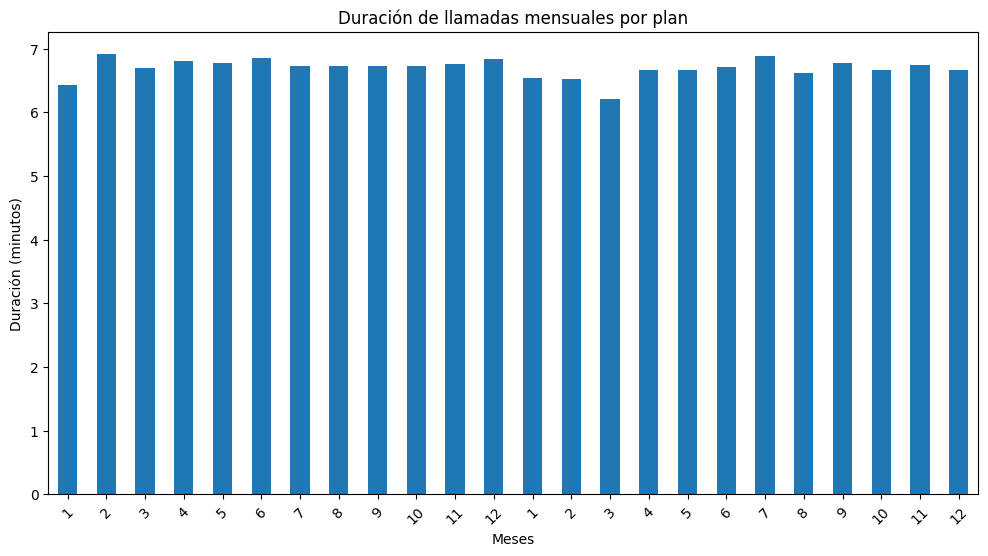

In [ ]:
mean_duration.plot(kind ='bar',
                   x = 'month',
                   y = 'mean_per_call',
                   figsize=(12,6),
                   title= 'Duración de llamadas mensuales por plan',
                   xlabel= 'Meses',
                   ylabel= 'Duración (minutos)',
                   rot= 45,
                   legend= False
                   )
plt.show()

*Creamos gráfico de barras con base en una tabla dinámica*

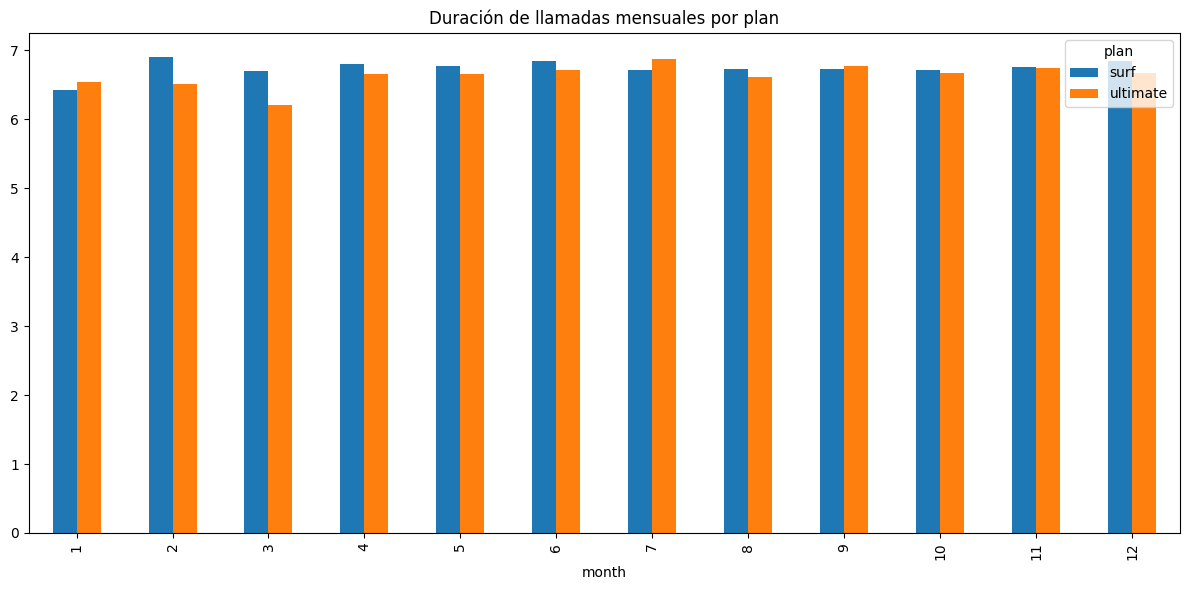

In [ ]:
mean_duration_pivot = mean_duration.pivot(index= 'month', columns= 'plan', values= 'mean_per_call')
mean_duration_pivot.plot(kind= 'bar', figsize= (12,6), title= 'Duración de llamadas mensuales por plan')
plt.tight_layout()
plt.show()

*Compararemos los minutos mensuales que requieren los usuarios para cada plan, lo anterior lo mostraremos con un histograma*

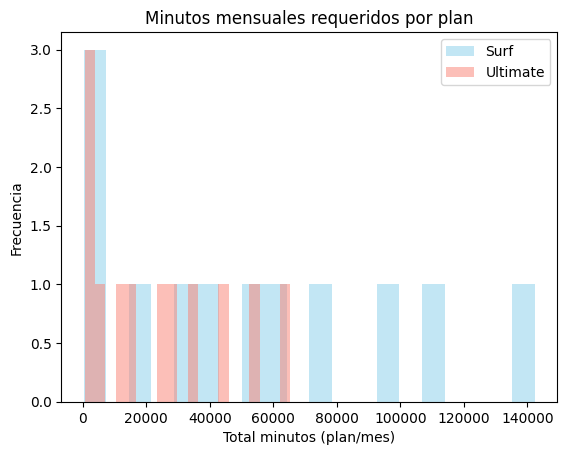

In [ ]:
#Creamos un df nuevo con la información de la tabla duracion llamadas para calcular el numero total de minutos por mes y plan
minutes_needed = duration_calls_per_plan.groupby(['plan','month']).agg(minutes_required = ('duration','sum')).reset_index()
#minutes_needed['minutes_required'] = minutes_needed['minutes_required'].round(2)
#Aplicamos los filtros necesarios para los hostogramas
surf = minutes_needed[minutes_needed['plan'] == 'surf']['minutes_required']
ultimate = minutes_needed[minutes_needed['plan'] == 'ultimate']['minutes_required']
#Realizamos los histogramas
plt.hist(surf, alpha= 0.5, label= 'Surf', color= 'skyblue', bins= 20)
plt.hist(ultimate, alpha= 0.5, label= 'Ultimate', color= 'salmon', bins= 20)

plt.title('Minutos mensuales requeridos por plan')
plt.xlabel('Total minutos (plan/mes)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
minutes_needed

,plan,month,minutes_required
0,surf,1,385.68
1,surf,2,2527.66
2,surf,3,7152.31
3,surf,4,16619.00
4,surf,5,29033.10
5,surf,6,39499.26
6,surf,7,51367.31
7,surf,8,62721.48
8,surf,9,75852.46
9,surf,10,96149.09


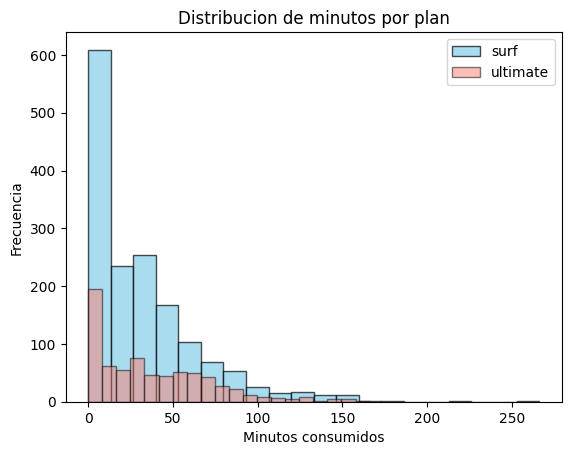

In [ ]:
msg_surf= service_rates[service_rates['plan']== 'surf']['number_of_msg']
msg_ultimate = service_rates[service_rates['plan']== 'ultimate']['number_of_msg']

plt.hist(msg_surf, alpha= 0.7, label= 'surf', color= 'skyblue', edgecolor= 'black', bins= 20)
plt.hist(msg_ultimate, alpha= 0.5, label= 'ultimate', color= 'salmon', edgecolor= 'black', bins= 20)

plt.title('Distribucion de minutos por plan')
plt.xlabel('Minutos consumidos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

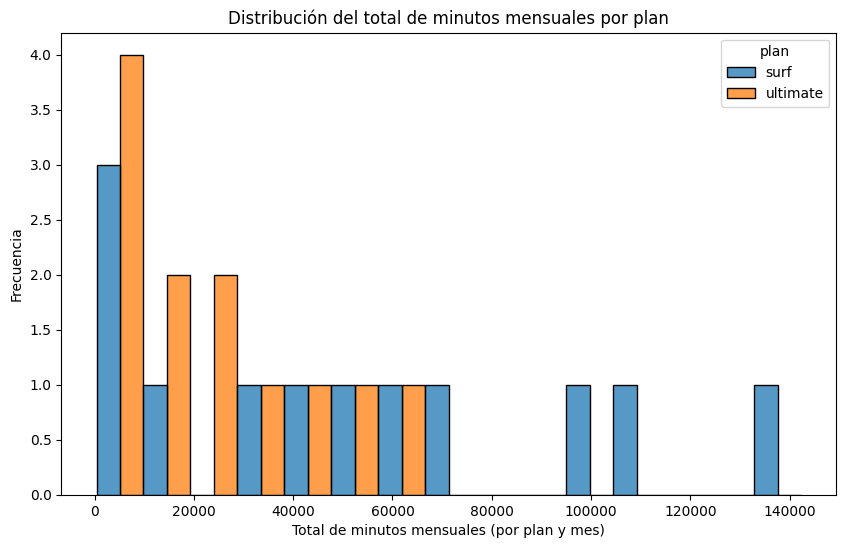

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=minutes_needed, x='minutes_required', hue='plan', multiple="dodge", bins=15) # Ajusta bins según sea necesario
plt.title('Distribución del total de minutos mensuales por plan')
plt.xlabel('Total de minutos mensuales (por plan y mes)')
plt.ylabel('Frecuencia')
plt.show()

*Calcularemos la media y la varianza para la duración mensual de las llamadas*

In [ ]:
mean_min = duration_calls_per_plan.groupby('plan')['duration'].mean().round(2)
var_min = duration_calls_per_plan.groupby('plan')['duration'].var().round(2)


print(f"Media de los minutos mensuales por plan: {mean_min}")
print(f"Varianza del total de minutos mensuales por plan:{var_min}")


Media de los minutos mensuales por plan: plan
surf        6.77
ultimate    6.70
Name: duration, dtype: float64
Varianza del total de minutos mensuales por plan:plan
surf        34.16
ultimate    33.96
Name: duration, dtype: float64


*Creamos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas*

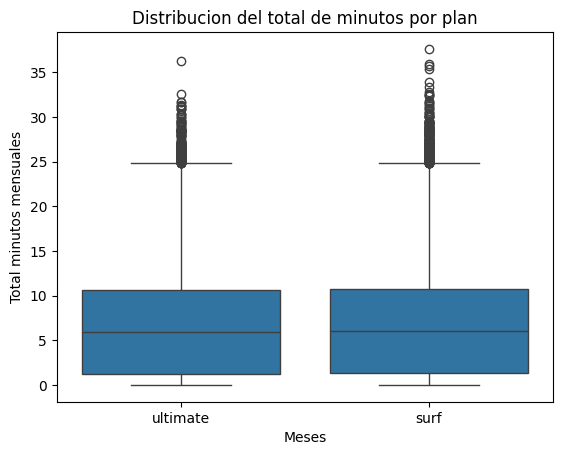

In [ ]:
plt.Figure(figsize= (8,6))
sns.boxplot(data= duration_calls_per_plan, x= 'plan' , y= 'duration')
plt.title('Distribucion del total de minutos por plan')
plt.xlabel('Meses')
plt.ylabel('Total minutos mensuales')
plt.show()

# 1.13.2 Mensajes

*Compararemos el número de mensajes que tienden a enviar los usuarios por plan mensualmete*

In [ ]:
service_rates.head()

,user_id,plan,usd_monthly_pay,month,number_of_calls,minutes_included,number_of_minuts,minutes_exceeded,usd_per_minute,add_cost_min,...,messages_exceeded,usd_per_message,add_cost_msg,mb_per_month_included,number_of_mb,mb_exceeded,usd_per_gb,add_cost_mb,add_cost_gb,add_cost_total
0,1000,ultimate,70,12,16,3000,116.83,0.0,0.01,0.0,...,0,0.01,0.00,30720,1901.47,0.0,7,0.0,0.0,0.00
1,1001,surf,20,8,27,500,171.14,0.0,0.03,0.0,...,0,0.03,0.00,15360,6919.15,0.0,10,0.0,0.0,0.00
2,1001,surf,20,9,49,500,297.69,0.0,0.03,0.0,...,0,0.03,0.00,15360,13314.82,0.0,10,0.0,0.0,0.00
3,1001,surf,20,10,65,500,374.11,0.0,0.03,0.0,...,3,0.03,0.09,15360,22330.49,7.0,10,69704.9,70.0,70.09
4,1001,surf,20,11,64,500,404.59,0.0,0.03,0.0,...,0,0.03,0.00,15360,18504.30,4.0,10,31443.0,40.0,40.00


In [ ]:
service_rates.columns

Index(['user_id', 'plan', 'usd_monthly_pay', 'month', 'number_of_calls',
       'minutes_included', 'number_of_minuts', 'minutes_exceeded',
       'usd_per_minute', 'add_cost_min', 'messages_included', 'number_of_msg',
       'messages_exceeded', 'usd_per_message', 'add_cost_msg',
       'mb_per_month_included', 'number_of_mb', 'mb_exceeded', 'usd_per_gb',
       'add_cost_mb', 'add_cost_gb', 'add_cost_total'],
      dtype='object')

In [ ]:
msg = service_rates.groupby(['plan', 'month']).agg(msg_sent = ('number_of_msg','count')).reset_index()

msg

,plan,month,msg_sent
0,surf,1,2
1,surf,2,9
2,surf,3,23
3,surf,4,50
4,surf,5,77
5,surf,6,97
6,surf,7,121
7,surf,8,162
8,surf,9,194
9,surf,10,237


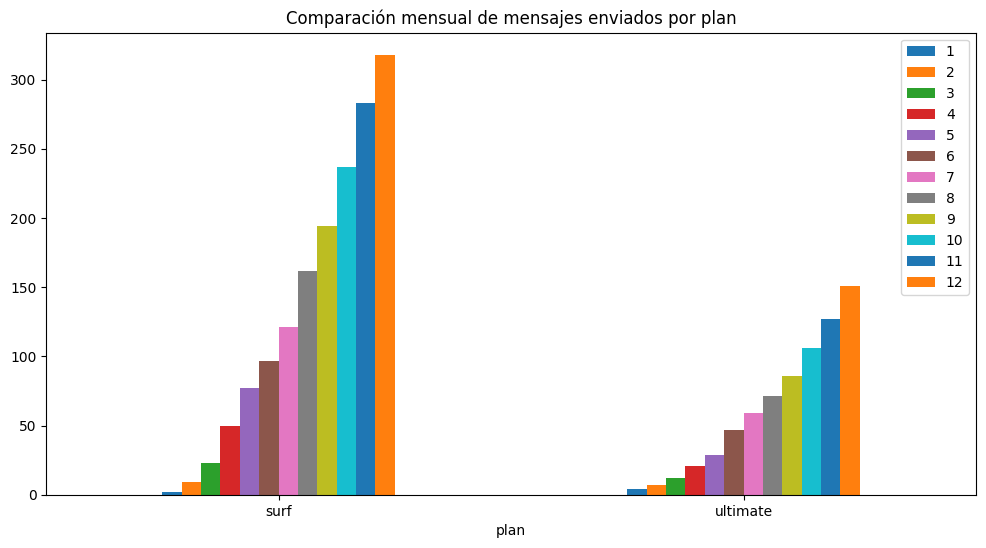

In [ ]:
msg_pivot = msg.pivot(index= 'plan', columns= 'month', values='msg_sent')
msg_pivot.plot(kind= 'bar', figsize= (12,6), rot=0, title= 'Comparación mensual de mensajes enviados por plan')
plt.legend()
plt.show()

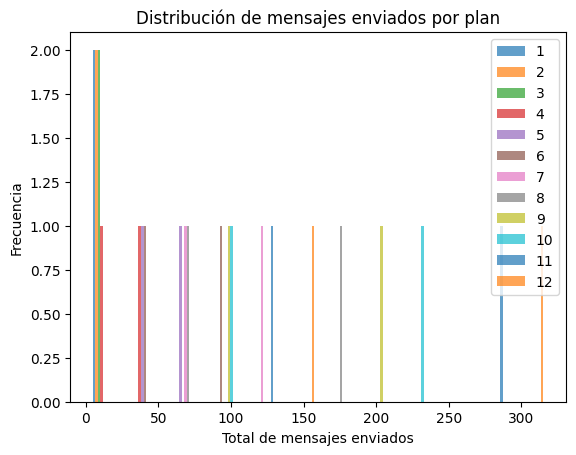

In [ ]:
msg_pivot_hist = msg.pivot(index= 'plan', columns= 'month', values= 'msg_sent')
plt.hist(msg_pivot_hist, alpha= 0.7, bins= 12, label= msg_pivot_hist.columns)
plt.title('Distribución de mensajes enviados por plan')
plt.xlabel('Total de mensajes enviados')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

*Calcularemos la media y la varianza*

In [ ]:
mean_msg= service_rates.groupby('plan')['number_of_msg'].mean()
var_msg = service_rates.groupby('plan')['number_of_msg'].var()

print(f"Media de los mensajes enviados por plan: {mean_msg}")
print(f"Varianza de los mensajes enviados por plan: {var_msg}")

Media de los mensajes enviados por plan: plan
surf        31.159568
ultimate    37.551389
Name: number_of_msg, dtype: float64
Varianza de los mensajes enviados por plan: plan
surf        1126.724522
ultimate    1208.756744
Name: number_of_msg, dtype: float64


In [ ]:
service_rates.groupby('plan')['number_of_msg'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


In [ ]:
(service_rates.groupby('plan').agg(
    media = ('number_of_msg', 'mean'),
    mediana = ('number_of_msg', 'median'),
    min = ('number_of_msg','min'),
    max = ('number_of_msg', 'max'),
    std = ('number_of_msg', 'std'),
    var = ('number_of_msg', 'var') 
))

,media,mediana,min,max,std,var
plan,,,,,,
surf,31.159568,24.0,0,266,33.566717,1126.724522
ultimate,37.551389,30.0,0,166,34.767179,1208.756744


C:\Users\ralf_\AppData\Local\Temp\ipykernel_8636\1328412562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= service_rates, x= 'plan', y= 'number_of_msg', palette= 'tab10' )


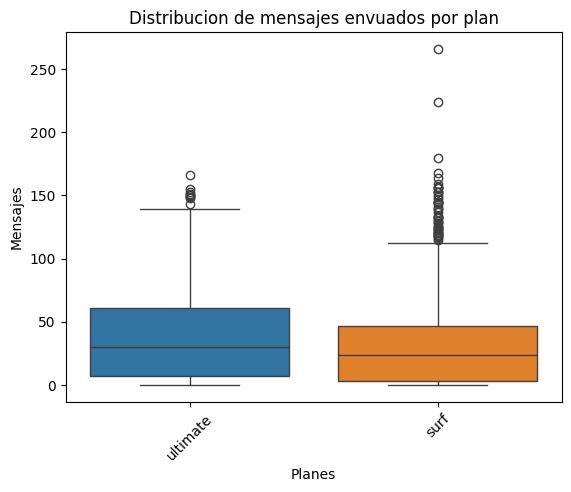

In [ ]:
plt.Figure(figsize= (8,6))
sns.boxplot(data= service_rates, x= 'plan', y= 'number_of_msg', palette= 'tab10' )
plt.title('Distribucion de mensajes envuados por plan')
plt.xticks(rotation=45)
plt.xlabel('Planes')
plt.ylabel('Mensajes')
plt.show()

# 1.13.3 Internet

*Comparar la cantidad de tráfico de internet consumido por usuarios por plan*

In [ ]:
service_rates.head()

,user_id,plan,usd_monthly_pay,month,number_of_calls,minutes_included,number_of_minuts,minutes_exceeded,usd_per_minute,add_cost_min,...,messages_exceeded,usd_per_message,add_cost_msg,mb_per_month_included,number_of_mb,mb_exceeded,usd_per_gb,add_cost_mb,add_cost_gb,add_cost_total
0,1000,ultimate,70,12,16,3000,116.83,0.0,0.01,0.0,...,0,0.01,0.00,30720,1901.47,0.0,7,0.0,0.0,0.00
1,1001,surf,20,8,27,500,171.14,0.0,0.03,0.0,...,0,0.03,0.00,15360,6919.15,0.0,10,0.0,0.0,0.00
2,1001,surf,20,9,49,500,297.69,0.0,0.03,0.0,...,0,0.03,0.00,15360,13314.82,0.0,10,0.0,0.0,0.00
3,1001,surf,20,10,65,500,374.11,0.0,0.03,0.0,...,3,0.03,0.09,15360,22330.49,7.0,10,69704.9,70.0,70.09
4,1001,surf,20,11,64,500,404.59,0.0,0.03,0.0,...,0,0.03,0.00,15360,18504.30,4.0,10,31443.0,40.0,40.00


In [ ]:
internet = service_rates.groupby('plan').agg(trafico_de_datos_gb = ('number_of_mb','sum')).reset_index() 
internet['trafico_de_datos_gb'] = np.ceil(internet['trafico_de_datos_gb']/ 1024)

internet

,plan,trafico_de_datos_gb
0,surf,25436.0
1,ultimate,12105.0


*Mostramos la informacion en un gráfico de barras*

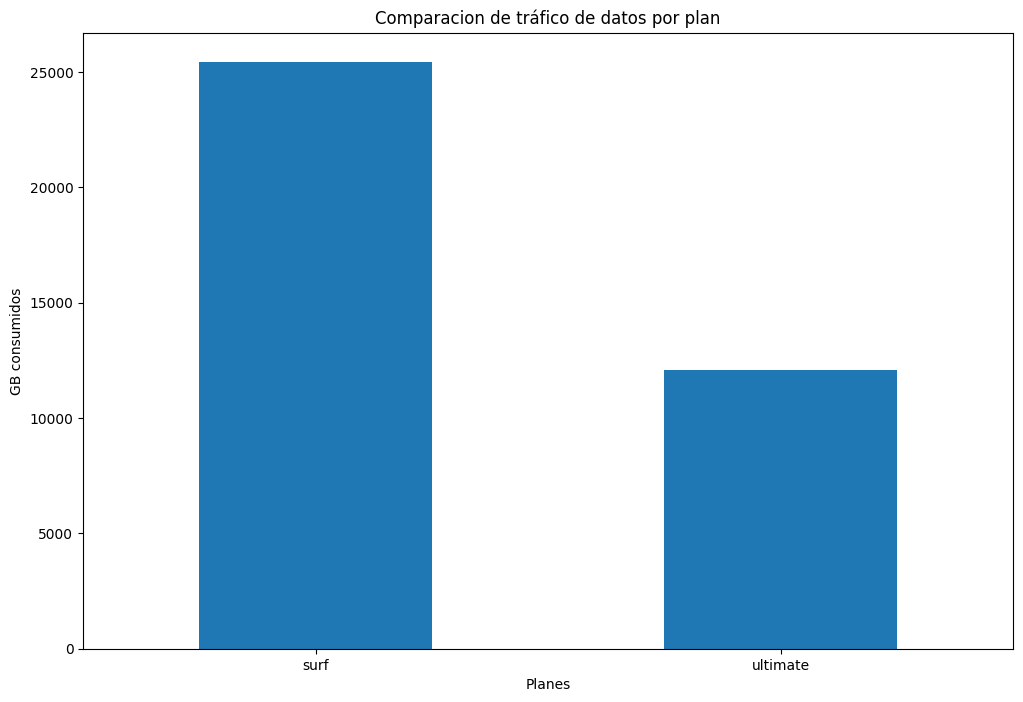

In [ ]:
internet.plot(kind='bar',
              x='plan',
              y='trafico_de_datos_gb',
              title= 'Comparacion de tráfico de datos por plan',
              xlabel= 'Planes',
              ylabel= 'GB consumidos',
              figsize= (12,8),
              rot= 0,
              legend=False
              )
plt.show()



*Lo representaremos con un histograma*

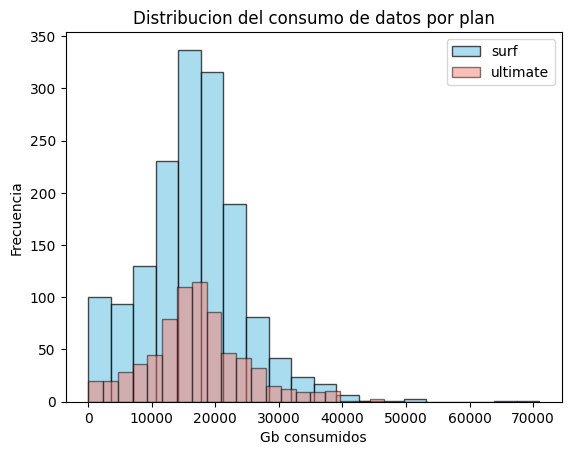

In [ ]:
internet_surf= service_rates[service_rates['plan']== 'surf']['number_of_mb']
internet_ultimate = service_rates[service_rates['plan']== 'ultimate']['number_of_mb']

plt.hist(internet_surf, alpha= 0.7, label= 'surf', color= 'skyblue', edgecolor= 'black', bins= 20)
plt.hist(internet_ultimate, alpha= 0.5, label= 'ultimate', color= 'salmon', edgecolor = 'black', bins= 20)

plt.title('Distribucion del consumo de datos por plan')
plt.xlabel('Gb consumidos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 1.13.4 Ingresos

**Calcularemos los ingresos mensuales por plan**

In [ ]:
service_rates.head()

,user_id,plan,usd_monthly_pay,month,number_of_calls,minutes_included,number_of_minuts,minutes_exceeded,usd_per_minute,add_cost_min,...,messages_exceeded,usd_per_message,add_cost_msg,mb_per_month_included,number_of_mb,mb_exceeded,usd_per_gb,add_cost_mb,add_cost_gb,add_cost_total
0,1000,ultimate,70,12,16,3000,116.83,0.0,0.01,0.0,...,0,0.01,0.00,30720,1901.47,0.0,7,0.0,0.0,0.00
1,1001,surf,20,8,27,500,171.14,0.0,0.03,0.0,...,0,0.03,0.00,15360,6919.15,0.0,10,0.0,0.0,0.00
2,1001,surf,20,9,49,500,297.69,0.0,0.03,0.0,...,0,0.03,0.00,15360,13314.82,0.0,10,0.0,0.0,0.00
3,1001,surf,20,10,65,500,374.11,0.0,0.03,0.0,...,3,0.03,0.09,15360,22330.49,7.0,10,69704.9,70.0,70.09
4,1001,surf,20,11,64,500,404.59,0.0,0.03,0.0,...,0,0.03,0.00,15360,18504.30,4.0,10,31443.0,40.0,40.00


In [ ]:
revenue_per_plan = service_rates.groupby(['plan']).agg(revenue = ('add_cost_total','sum')).reset_index()
revenue_per_plan

,plan,revenue
0,surf,63434.89
1,ultimate,1666.00


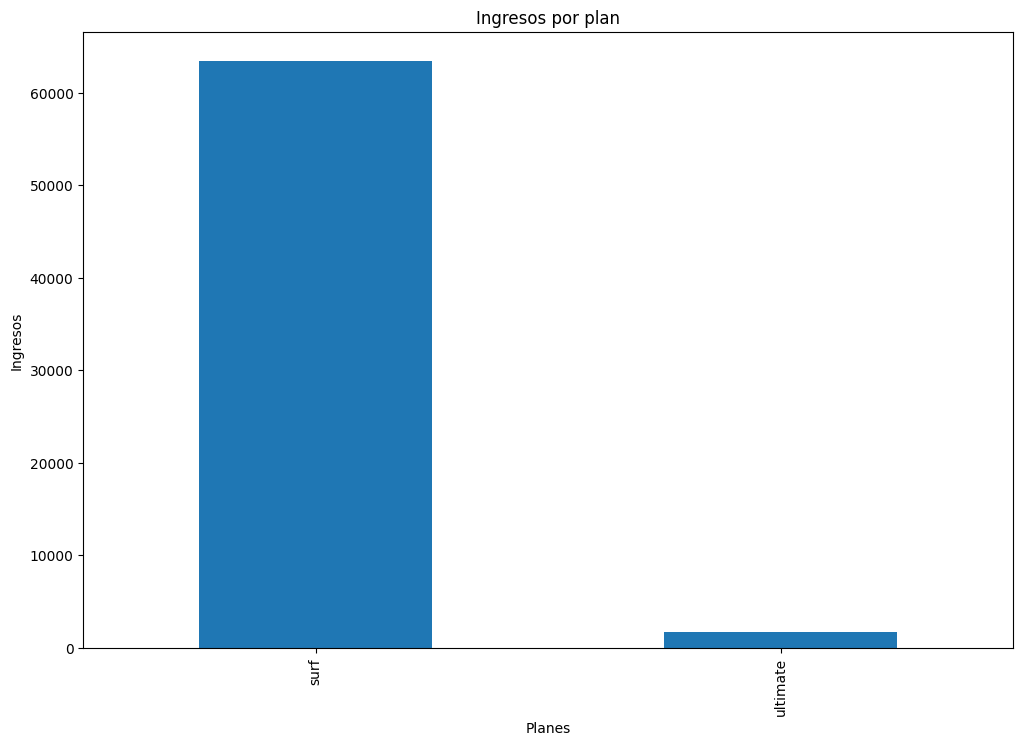

In [ ]:
revenue_per_plan.plot(kind= 'bar',
                      x= 'plan',
                      y= 'revenue',
                      title= 'Ingresos por plan',
                      figsize= (12,8),
                      xlabel= 'Planes',
                      ylabel= 'Ingresos',
                      legend=False
                      )
plt.show()

In [ ]:
mean_revenue = service_rates.groupby('plan')['add_cost_total'].mean()
var_revenue = service_rates.groupby('plan')['add_cost_total'].var()

print(f"Media de ingresos por plan: {mean_revenue}")
print(f"Varianza de ingresos por plan: {var_revenue}")

Media de ingresos por plan: plan
surf        40.327330
ultimate     2.313889
Name: add_cost_total, dtype: float64
Varianza de ingresos por plan: plan
surf        3053.962550
ultimate     129.848486
Name: add_cost_total, dtype: float64


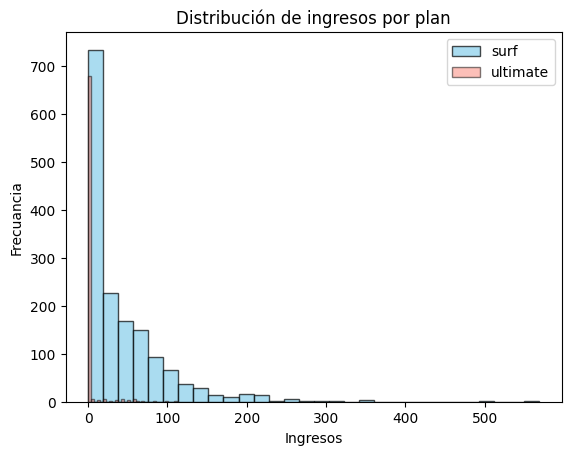

In [ ]:
revenue_surf = service_rates[service_rates['plan'] == 'surf']['add_cost_total']
revenue_ultimate = service_rates[service_rates['plan'] == 'ultimate']['add_cost_total']

plt.hist(revenue_surf, bins= 30, alpha= 0.7, label= 'surf', color= 'skyblue', edgecolor= 'black')
plt.hist(revenue_ultimate, bins= 30, alpha= 0.5, label= 'ultimate', color= 'salmon', edgecolor= 'black')

plt.title('Distribución de ingresos por plan')
plt.xlabel('Ingresos')
plt.ylabel('Frecuancia')
plt.legend()
plt.show()

In [ ]:
service_rates

,user_id,plan,usd_monthly_pay,month,number_of_calls,minutes_included,number_of_minuts,minutes_exceeded,usd_per_minute,add_cost_min,...,messages_exceeded,usd_per_message,add_cost_msg,mb_per_month_included,number_of_mb,mb_exceeded,usd_per_gb,add_cost_mb,add_cost_gb,add_cost_total
0,1000,ultimate,70,12,16,3000,116.83,0.0,0.01,0.0,...,0,0.01,0.00,30720,1901.47,0.0,7,0.0,0.0,0.00
1,1001,surf,20,8,27,500,171.14,0.0,0.03,0.0,...,0,0.03,0.00,15360,6919.15,0.0,10,0.0,0.0,0.00
2,1001,surf,20,9,49,500,297.69,0.0,0.03,0.0,...,0,0.03,0.00,15360,13314.82,0.0,10,0.0,0.0,0.00
3,1001,surf,20,10,65,500,374.11,0.0,0.03,0.0,...,3,0.03,0.09,15360,22330.49,7.0,10,69704.9,70.0,70.09
4,1001,surf,20,11,64,500,404.59,0.0,0.03,0.0,...,0,0.03,0.00,15360,18504.30,4.0,10,31443.0,40.0,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,surf,20,12,39,500,324.77,0.0,0.03,0.0,...,0,0.03,0.00,15360,23137.69,8.0,10,77776.9,80.0,80.00
2299,1499,surf,20,9,41,500,330.37,0.0,0.03,0.0,...,0,0.03,0.00,15360,12984.76,0.0,10,0.0,0.0,0.00
2300,1499,surf,20,10,53,500,363.28,0.0,0.03,0.0,...,0,0.03,0.00,15360,19492.43,5.0,10,41324.3,50.0,50.00
2301,1499,surf,20,11,45,500,288.56,0.0,0.03,0.0,...,0,0.03,0.00,15360,16813.83,2.0,10,14538.3,20.0,20.00


# 1.15 Prueba de hipótesis

**Probaremos la hipótesis de que son diferentes los ingresos promedio precedente de los usuarios de los planes Ultimate y Surf**

**Hipótesis nula y alternatica con prueba 't' Studens para muestras independientes**

In [ ]:
#Identificamos los ingresos totales de ambos planes por separado 
ultimate_income= service_rates[service_rates['plan'] == 'ultimate']['add_cost_total']
surf_income = service_rates[service_rates['plan'] == 'surf']['add_cost_total']
#Determinamos el valor "t" y el "p-valor"
t_statistic, p_value = stats.ttest_ind(ultimate_income, surf_income)
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


Estadístico t: -18.278387928183548
Valor p: 8.820505603061949e-70


**Interpretación del resultado anterior**

*Estadístico t: -18.278387928183548: Nos indica la magnitud de la diferecia que existe entre los dos grupos alnalizados (ultimate vs surf), es decir que los al darnos un número negativo de -18 se puede comprobar que los ingresos del plan ultiamte son significativamente más bajos que los de suf.*

*Valor p: 8.820505603061949e-70: nos indica que el valor p es mucho menor que nuestro valor alfa 0.05 por lo cual podemos rechazar la hipótesis nula, esto significa que hay sufuciente evidenca estadistica para concluir que los ingresos promedio analizados de los planes Ultimate y Surf son diferentes.*


**Porbaremos la hípotesis de que el ingreso promedio de los usuarios del área de NY-NJ es diferente a los usuarios de otras regiones**

*Hípotesis nula y alternativa calculdada con la prueda estadístida "t" y con valor alfa de 0.05*

In [ ]:
ny_nj = pd.merge(service_rates, users, on= 'user_id', how= 'left')

col_del = ['user_id', 'usd_monthly_pay', 'month', 'number_of_calls',
       'minutes_included', 'number_of_minuts', 'minutes_exceeded',
       'usd_per_minute', 'add_cost_min', 'messages_included', 'number_of_msg',
       'messages_exceeded', 'usd_per_message', 'add_cost_msg',
       'mb_per_month_included', 'number_of_mb', 'mb_exceeded', 'usd_per_gb',
       'add_cost_mb', 'add_cost_gb', 'first_name',
       'last_name', 'age', 'reg_date', 'plan_y', 'churn_date']
ny_nj = ny_nj.drop(labels= col_del, axis='columns')



ny_nj.head()




NameError: name 'service_rates' is not defined

In [ ]:
income_ny_nj = ny_nj[ny_nj['city'].str.contains('New York', na=False)]
income_other_cities = ny_nj[~ny_nj['city'].str.contains('New York', na=False)]

t_statistic, p_value = stats.ttest_ind(income_ny_nj['add_cost_total'], income_other_cities['add_cost_total'])

print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

Estadístico t: 1.1149080333674208
Valor p: 0.265006772620321


In [ ]:
income_ny_nj = ny_nj[ny_nj['city'].str.contains('New York', na=False)]['add_cost_total'].count()
income_other_cities = ny_nj[~ny_nj['city'].str.contains('New York', na=False)]['add_cost_total'].count()

print(f"El ingreso total de NY es: {income_ny_nj}")
print(f"El ingreso total de otras ciudades es: {income_other_cities}")

El ingreso total de NY es: 377
El ingreso total de otras ciudades es: 1916


In [ ]:
ny_nj['add_cost_total'].sum()

np.float64(65100.89)